<a href="https://colab.research.google.com/github/Kulkarni-mohit/IPO-Classifier/blob/main/IPO_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

## inserting and preprocessing Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Mohit-Kulkarni1/IPO-Classifier/main/ipo_2010_2021.csv')

In [4]:
df.head()

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
0,29-07-21,Tatva Chintan,https://www.moneycontrol.com/ipo/tatva-chintan...,500.00,2.55,9.78,13.36,9.50,1083.0,2111.8,2310.25,113.32,"2,268.50",109.46
1,23-07-21,Zomato,https://www.moneycontrol.com/ipo/zomato_Z01.html,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46
2,19-07-21,Clean Science,https://www.moneycontrol.com/ipo/clean-science...,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,1585.20,76.13,"1,682.80",86.98
3,19-07-21,G R Infra,https://www.moneycontrol.com/ipo/g-r-infra_I13...,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,1746.80,108.70,"1,730.85",106.79
4,07-07-21,India Pesticide,https://www.moneycontrol.com/ipo/india-pestici...,800.00,2.64,1.36,4.40,3.25,296.0,360.0,335.45,13.33,337.40,13.99


In [5]:
df.describe()

,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),Current Gains (%)
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,262.00000
mean,978.718106,23.732841,68.798561,7.388371,25.944886,339.291667,403.329735,363.170152,4.290871,57.14145
std,1884.758112,36.880595,136.513479,11.837761,45.444680,333.874356,437.396998,417.120358,46.343783,240.46593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.500000,1.570000,-97.150000,-99.93000
25%,144.250000,1.130000,1.210000,1.297500,1.570000,109.500000,117.750000,93.025000,-11.755000,-80.50500
50%,441.225000,4.670000,5.075000,3.380000,4.845000,220.000000,251.300000,208.225000,1.355000,-3.92500
75%,903.187500,32.505000,65.112500,8.392500,33.412500,447.000000,546.250000,520.425000,25.635000,94.58000
max,15475.000000,176.850000,958.070000,77.930000,277.280000,1766.000000,2725.000000,3118.650000,153.500000,2500.14000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    264 non-null    object 
 1   IPO Name                264 non-null    object 
 2   Profile                 264 non-null    object 
 3   Issue Size (in crores)  264 non-null    float64
 4   QIB                     264 non-null    float64
 5   HNI                     264 non-null    float64
 6   RII                     264 non-null    float64
 7   Total                   264 non-null    float64
 8   Issue                   264 non-null    float64
 9   Listing Open            264 non-null    float64
 10  Listing Close           264 non-null    float64
 11  Listing Gains(%)        264 non-null    float64
 12  CMP                     264 non-null    object 
 13  Current  Gains (%)      262 non-null    float64
dtypes: float64(10), object(4)
memory usage: 29

In [7]:
# droping missing values as only 2 are present

df.dropna(axis=0,inplace= True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 263
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    262 non-null    object 
 1   IPO Name                262 non-null    object 
 2   Profile                 262 non-null    object 
 3   Issue Size (in crores)  262 non-null    float64
 4   QIB                     262 non-null    float64
 5   HNI                     262 non-null    float64
 6   RII                     262 non-null    float64
 7   Total                   262 non-null    float64
 8   Issue                   262 non-null    float64
 9   Listing Open            262 non-null    float64
 10  Listing Close           262 non-null    float64
 11  Listing Gains(%)        262 non-null    float64
 12  CMP                     262 non-null    object 
 13  Current  Gains (%)      262 non-null    float64
dtypes: float64(10), object(4)
memory usage: 30

In [9]:
df[df['Issue Size (in crores)']==0]

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
161,06-12-12,Tara Jewels,https://www.moneycontrol.com/ipo/tara-jewels_T...,0.0,1.49,3.10,2.05,1.98,230.0,242.00,229.95,-0.02,0.76,-99.67
222,08-10-10,Electrosteel St,https://www.moneycontrol.com/ipo/electrosteel-...,0.0,5.86,28.58,6.19,8.23,11.0,11.15,11.25,2.27,31.05,182.27
259,19-02-10,Thangamayil,https://www.moneycontrol.com/ipo/thangamayil_T...,0.0,0.52,1.52,2.26,1.12,75.0,70.00,71.10,-5.20,870.00,1060.00


In [10]:
df[df['Total']==0]

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
9,14-05-21,PowerGrid InvIT,https://www.moneycontrol.com/ipo/powergrid-inv...,7734.99,0.0,0.0,0.0,0.0,100.0,104.0,102.98,2.98,119.00,19.00
11,07-04-21,Barbeque Nat,https://www.moneycontrol.com/ipo/barbeque-nat_...,453.60,0.0,0.0,0.0,0.0,500.0,492.0,590.40,18.08,878.70,75.74
117,11-08-16,Dilip Buildcon,https://www.moneycontrol.com/ipo/dilip-buildco...,430.00,0.0,0.0,0.0,0.0,219.0,240.0,251.95,15.05,560.00,155.71
133,16-11-15,S H Kelkar,https://www.moneycontrol.com/ipo/s-h-kelkar_KC...,200.00,0.0,0.0,0.0,0.0,180.0,216.0,207.30,15.17,169.10,-6.06
207,15-12-10,MOIL,https://www.moneycontrol.com/ipo/moil_M11.html,1260.00,0.0,0.0,0.0,0.0,375.0,551.0,233.25,-37.80,190.10,-49.31


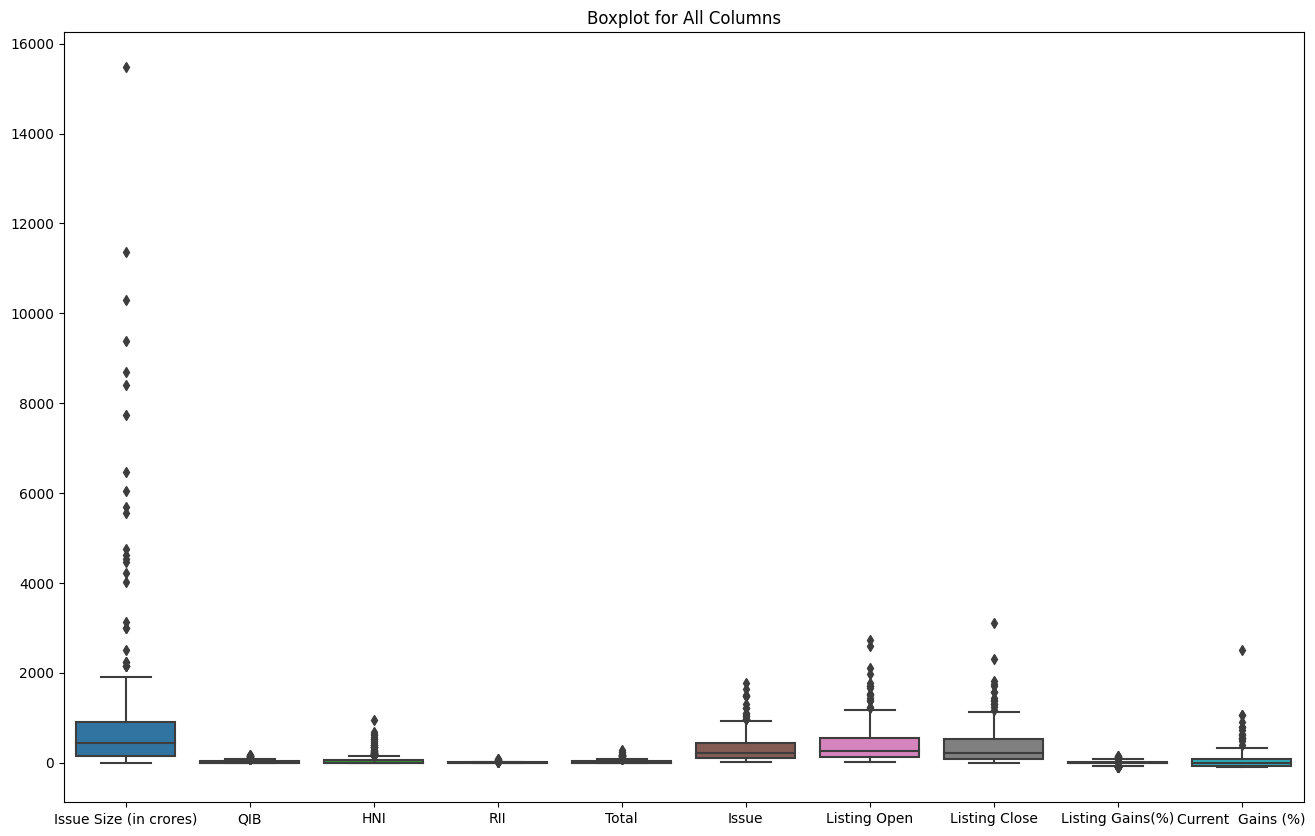

In [11]:
plt.figure(figsize = (16, 10))
sns.boxplot(data = df)
plt.title('Boxplot for All Columns')
plt.show()

In [12]:
df[df['Issue Size (in crores)']>df['Issue Size (in crores)'].quantile(0.9)]

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
1,23-07-21,Zomato,https://www.moneycontrol.com/ipo/zomato_Z01.html,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46
5,05-07-21,Krishna Inst.,https://www.moneycontrol.com/ipo/krishna-inst....,2146.00,5.26,1.89,2.90,3.86,825.0,1009.0,1096.80,32.95,"1,206.60",46.25
8,24-06-21,Sona BLW,https://www.moneycontrol.com/ipo/sona-blw_SBP0...,5550.00,1.57,0.22,0.66,1.04,291.0,302.4,362.85,24.69,438.90,50.82
9,14-05-21,PowerGrid InvIT,https://www.moneycontrol.com/ipo/powergrid-inv...,7734.99,0.00,0.00,0.00,0.00,100.0,104.0,102.98,2.98,119.00,19.00
10,19-04-21,Macrotech Dev,https://www.moneycontrol.com/ipo/macrotech-dev...,2500.00,3.05,1.44,0.40,1.36,486.0,439.0,463.15,-4.70,853.45,75.61
26,29-01-21,IRFC,https://www.moneycontrol.com/ipo/irfc_IRF.html,4633.00,0.89,0.52,1.59,1.16,26.0,25.0,24.85,-4.42,23.00,-11.54
30,20-11-20,Gland,https://www.moneycontrol.com/ipo/gland_GP14.html,6479.55,6.40,0.51,0.24,2.06,1500.0,1710.0,1820.45,21.36,"3,920.00",161.33
32,12-10-20,UTI AMC,https://www.moneycontrol.com/ipo/uti-amc_UA03....,2159.88,3.34,0.93,2.32,2.31,554.0,476.2,476.60,-13.97,"1,042.05",88.10
35,01-10-20,CAMS,https://www.moneycontrol.com/ipo/cams_CAM.html,2244.33,73.18,111.85,5.55,46.99,1230.0,1535.0,1401.60,13.95,"3,344.45",171.91
40,16-03-20,SBI Card,https://www.moneycontrol.com/ipo/sbi-card_SCP0...,10286.20,57.18,45.23,2.50,26.54,755.0,658.0,683.20,-9.51,"1,036.45",37.28


Initially, I believed that the issue size column contained some outliers, but after looking over the records, I no longer think those are outliers because major players like Zomato, ICICI, HDFC, Coal India, PNB, Hindustan Aero, etc., can have large issue sizes.

In [13]:
# Date decomposition
df["date"] = pd.to_datetime(df["Date"])
df["month"] = df['date'].dt.month
df["day"] = df['date'].dt.day
df["year"] = df['date'].dt.year

In [14]:
df.tail()

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%),date,month,day,year
259,19-02-10,Thangamayil,https://www.moneycontrol.com/ipo/thangamayil_T...,0.00,0.52,1.52,2.26,1.12,75.0,70.00,71.10,-5.20,870.00,1060.00,2010-02-19,2,19,2010
260,15-02-10,Vascon Engineer,https://www.moneycontrol.com/ipo/vascon-engine...,199.80,1.12,3.65,0.62,1.22,165.0,155.90,146.38,-11.28,21.70,-86.85,2010-02-15,2,15,2010
261,15-02-10,Syncom Health,https://www.moneycontrol.com/ipo/syncom-health...,56.25,0.99,16.60,6.25,5.17,75.0,88.00,87.85,17.13,4.06,-94.59,2010-02-15,2,15,2010
262,08-02-10,Jubilant Food,https://www.moneycontrol.com/ipo/jubilant-food...,328.70,59.39,51.95,3.79,31.11,145.0,160.00,114.50,-21.03,"3,770.20",2500.14,2010-08-02,8,2,2010
263,03-02-10,Infinite Comp,https://www.moneycontrol.com/ipo/infinite-comp...,189.80,48.44,106.02,11.08,43.22,165.0,178.35,184.51,11.82,473.75,187.12,2010-03-02,3,2,2010


In [15]:
# Drop unnecessary columns
df.drop('Profile', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

In [16]:
df.head()

,IPO Name,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%),month,day,year
0,Tatva Chintan,500.00,2.55,9.78,13.36,9.50,1083.0,2111.8,2310.25,113.32,"2,268.50",109.46,7,29,2021
1,Zomato,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46,7,23,2021
2,Clean Science,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,1585.20,76.13,"1,682.80",86.98,7,19,2021
3,G R Infra,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,1746.80,108.70,"1,730.85",106.79,7,19,2021
4,India Pesticide,800.00,2.64,1.36,4.40,3.25,296.0,360.0,335.45,13.33,337.40,13.99,7,7,2021


In [17]:
# Converting Current Market Price(CMP) from object to numeric type
df['CMP'] = pd.to_numeric(df['CMP'], errors='coerce')

In [53]:
# Select only the numerical columns for standardization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the selected numerical columns and transform them
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [18]:
df.columns

Index(['IPO Name', 'Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total',
       'Issue', 'Listing Open', 'Listing Close', 'Listing Gains(%)', 'CMP',
       'Current  Gains (%)', 'month', 'day', 'year'],
      dtype='object')

## Model to predict Listing price of ipo

In [54]:
X = df[['Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue', 'month', 'day', 'year']]
y = df['Listing Open']

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Training Random Forest Regressor

In [56]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [57]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [59]:
y_predd = rf_regressor.predict(X_train)

In [60]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [61]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.1638359383467205
R-squared: 0.8550342917840019


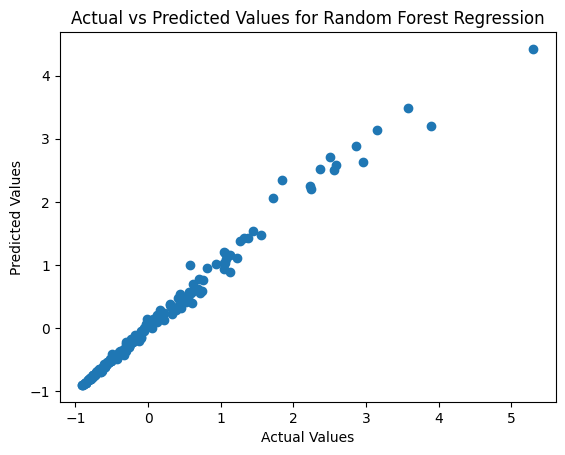

In [62]:
# Plotting actual vs predicted values
plt.scatter(y_train, y_predd)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.show()

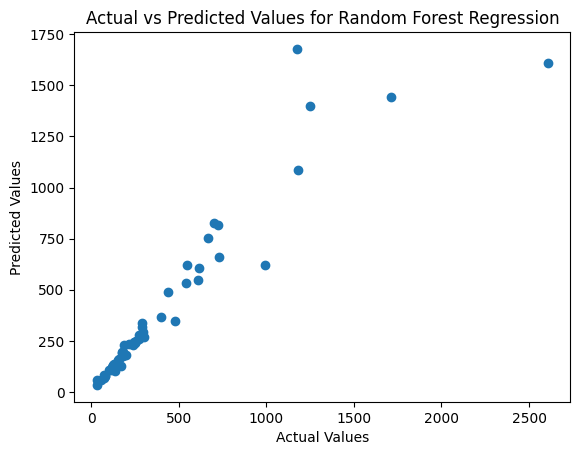

In [32]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.show()

### Trying out XGBOOST Regressor

In [63]:
import xgboost as xgb

In [64]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [46]:
param = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'booster': 'gbtree',
    'learning_rate': 0.05,
    'max_depth': 3,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'verbosity': 1
}

In [47]:
num_round = 1000
evals_result = {}

In [65]:
xgb_model = xgb.train(
    param,
    dtrain,
    num_boost_round=num_round,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=10,
    evals_result=evals_result,
    verbose_eval=True
)

[0]	eval-rmse:1.02295
[1]	eval-rmse:0.98558
[2]	eval-rmse:0.97276
[3]	eval-rmse:0.93875
[4]	eval-rmse:0.92741
[5]	eval-rmse:0.89414
[6]	eval-rmse:0.86309
[7]	eval-rmse:0.83211
[8]	eval-rmse:0.80959
[9]	eval-rmse:0.78552
[10]	eval-rmse:0.77412
[11]	eval-rmse:0.76138
[12]	eval-rmse:0.73613
[13]	eval-rmse:0.71581
[14]	eval-rmse:0.69643
[15]	eval-rmse:0.67966
[16]	eval-rmse:0.66398
[17]	eval-rmse:0.64849
[18]	eval-rmse:0.63521
[19]	eval-rmse:0.62011
[20]	eval-rmse:0.59984
[21]	eval-rmse:0.58571
[22]	eval-rmse:0.57367
[23]	eval-rmse:0.56342
[24]	eval-rmse:0.55386
[25]	eval-rmse:0.54142
[26]	eval-rmse:0.53266
[27]	eval-rmse:0.52929
[28]	eval-rmse:0.52049
[29]	eval-rmse:0.51445
[30]	eval-rmse:0.50160
[31]	eval-rmse:0.49378
[32]	eval-rmse:0.48230
[33]	eval-rmse:0.47608
[34]	eval-rmse:0.46682
[35]	eval-rmse:0.45789
[36]	eval-rmse:0.45556
[37]	eval-rmse:0.44625
[38]	eval-rmse:0.44278
[39]	eval-rmse:0.43466
[40]	eval-rmse:0.42637
[41]	eval-rmse:0.42163
[42]	eval-rmse:0.41817
[43]	eval-rmse:0.4114

In [66]:
y_pred = xgb_model.predict(dtest)

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [68]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.10642414060788122
R-squared: 0.9058335364622443


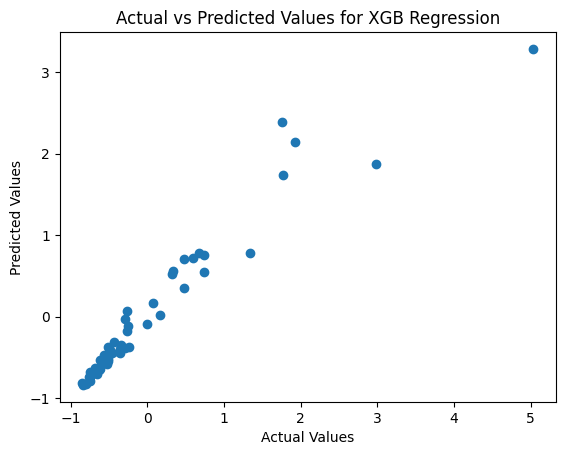

In [69]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for XGB Regression')
plt.show()

## Conclusion

* As XGBoost giving low mean squared error, hence we can use this model for predicting the ipo's listing price for the investment.